In [ ]:
#SENARYO 2 GENETİK ALGORİTMA

In [ ]:
#YAŞAR AZRA KARAGÖZ
#2212721002

In [ ]:
import random
import matplotlib.pyplot as plt
#kütüphaneler
#matplotlib.pyplot: Genetik algoritmanın ilerleyişini grafikle göstermek için

In [ ]:
POPULASYONBOYUTU = 20
NESILSAYISI = 100
MUTASYONORANI = 0.1

X1_MIN = 30
X1_MAX = 100
#değer tanımlaması
#Problem kısıtları

In [ ]:
def fitness(x1):
    x2 = 100 - x1
    return 5*x1 + 2*x2 - x1*x2
#amaç fonksiyonu kısıtlar korunur
#x₂, toplamın yüzde 100 olması kısıtı nedeniyle otomatik hesaplanır
#Fonksiyonun çıktısı (fitness) değeridir

In [ ]:
#başlangıç popülasyonu oluşturma
def baslangic_populasyonu():
    return [random.randint(X1_MIN, X1_MAX) for _ in range(POPULASYONBOYUTU)]
#Rastgele çözümlerden oluşan ilk nesil oluşturulur
#Her birey x₁ ≥ 30 koşulunu sağlar
#Liste içinde her eleman bir kromozomu temsil eder

In [ ]:
#seçilim
def secilim(populasyon):
    a, b = random.sample(populasyon, 2)
    return a if fitness(a) > fitness(b) else b
#Fitness değeri yüksek olan birey seçilerek ebeveyn olur
#Bu yöntem güçlü bireylerin hayatta kalmasını sağlar

In [ ]:
#çaprazlama
def caprazlama(parent1, parent2):
    return int((parent1 + parent2) / 2)


In [ ]:
#mutasyon
def mutasyon(x1):
    if random.random() < MUTASYONORANI:
        x1 += random.randint(-5, 5)

    # Kısıt kontrolü
    x1 = max(X1_MIN, min(X1_MAX, x1))
    return x1
#Belirli olasılıkla bireyin geni değiştirilir

In [ ]:
# Genetik algoritma fonksiyonu
def genetik_algoritma():
    populasyon = baslangic_populasyonu()
    en_iyiler = []
    # İlk popülasyon oluşturulur
    # Her neslin en iyi fitness değeri saklanır

    for nesil in range(NESILSAYISI):
        yeni_populasyon = []
#Algoritma nesil sayısı kadar çalışır
        for _ in range(POPULASYONBOYUTU):
            parent1 = secilim(populasyon)
            parent2 = secilim(populasyon)
            child = caprazlama(parent1, parent2)
            child = mutasyon(child)
            yeni_populasyon.append(child)
#Ebeveyn seçimi
#çaprazlama ile çocuk üretimi
#Mutasyon uygulanması
        populasyon = yeni_populasyon

        en_iyi = max(populasyon, key=fitness)
        en_iyiler.append(fitness(en_iyi))
#Fitness değeri grafik için kaydedilir
    return en_iyi, fitness(en_iyi), en_iyiler
#En iyi çözüm, fitness değeri ve gelişim grafiği döndürülür

In [ ]:
#algoritmayı çalıştırma kodu
eniyix1, eniyiskor, skorlar = genetik_algoritma()

print("En iyi Pigment A (x1):", eniyix1)
print("En iyi Pigment B (x2):", 100 - eniyix1)
print("Maksimum renk kalitesi:", eniyiskor)


En iyi Pigment A (x1): 100
En iyi Pigment B (x2): 0
Maksimum renk kalitesi: 500


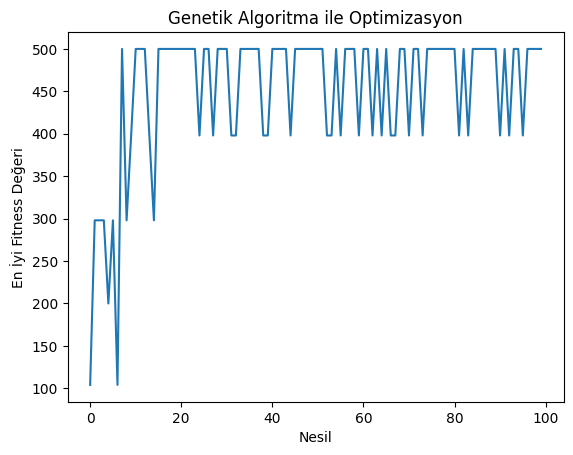

In [ ]:
plt.plot(skorlar)
plt.xlabel("Nesil")
plt.ylabel("En İyi Fitness Değeri")
plt.title("Genetik Algoritma ile Optimizasyon")
plt.show()
#grafiği gösterir